In [10]:
%matplotlib notebook

In [11]:
import numpy as np
import pandas as pd

<hr style="border-width:3px; border-color:coral"/>
# Timing results for pressure Poisson solver
<hr style="border-width:3px; border-color:coral"/>


Four sets of solver types are reported. In the full matrix system, the discretized system $A\mathbf x = \mathbf b$ is solved. In the Schur complement system, a linear system for the interface values is solved, and a fast FFT-based solver is used for patch solves.  In either the Full or the Schur approaches, GMRES is used as the basci solver (from HYPRE?) along with an an AMG pre-conditioner, either from HYPRE (BoomerAMG) or using the GPU based implementation AMGX. 

The four simulations reported below are then
* Full matrix with HYPRE used as the pre-conditioner for the full system. [Full matrix (HYPRE)](#fullhypre)
* Schur matrix with HYPRE used as the pre-conditioner for the Schur complement system. [Schur matrix (HYPRE)](#schurhypre)
* Full matrix with AMGX used as the pre-conditioner for the full system. [Full matrix (AMGX)](#fullamgx)
* Schur matrix with AMGX used as the pre-conditioner for the Schur complement system. [Schur matrix (AMGX)](#schuramgx)

We also include comparisions between HYPRE and the Schur matrix approach [here](#comparisons).

<hr style="border-width:3px; border-color:coral"/>

In [12]:
%reload_ext autoreload
%autoreload 2

from results_output import *

## Read in spreadsheet data

In [13]:
timing_results = pd.read_excel("Timing_results.xlsx",sheet_name=None)
div_factor = 3
df_full_hypre  = timing_results["full_hypre ({:d})".format(div_factor)]
df_schur_hypre = timing_results["schur_hypre ({:d})".format(div_factor)]
df_full_amgx   = timing_results["full_amgx ({:d})".format(div_factor)]
df_full_amgx.index = [2,3,4]
df_schur_amgx  = timing_results["schur_amgx ({:d})".format(div_factor)]


# For HYPRE results
cols_setup_hypre = ['matrix_setup','hypre_setup']
df_full_hypre['complete_setup'] = df_full_hypre[cols_setup_hypre].sum(axis=1)
df_schur_hypre['complete_setup'] = df_schur_hypre[cols_setup_hypre].sum(axis=1)

# Fix AMGX results
cols_setup_amgx = ['matrix_setup','amgx_setup']
df_full_amgx['complete_setup'] = df_full_amgx[cols_setup_amgx].sum(axis=1)
df_schur_amgx['complete_setup'] = df_schur_amgx[cols_setup_amgx].sum(axis=1)

cols_solve_full =['linsolve']
cols_solve_schur = ['linsolve','patch_solve']

<a id='fullhypre'></a>
<hr style="border-width:3px; border-color:coral"/>
# Full matrix (HYPRE) 
<hr style="border-width:3px; border-color:coral"/>

In [14]:
print_table(df_full_hypre);

,p,iterations,residual,error,domain_init,matrix_setup,hypre_setup,linsys_setup,linsolve,complete_solve,complete_setup
0,1,27,6.00e-10,2.30e-04,2.3154,3.3369,10.398,13.7349,68.0681,68.0681,13.7349
1,2,25,1.43e-10,2.30e-04,1.2637,2.0570,391.672,393.7291,40.4928,40.4928,393.7291
2,4,26,1.73e-10,2.30e-04,0.6479,1.0631,186.426,187.4890,29.4081,29.4083,187.4890
3,8,26,9.50e-11,2.30e-04,0.3401,0.5936,71.9993,72.5930,24.1166,24.1182,72.5930
4,16,25,4.12e-10,2.30e-04,0.1813,0.3467,21.9935,22.3402,17.5558,17.5584,22.3402
5,32,25,2.11e-10,2.30e-04,0.0899,0.1617,6.54061,6.7024,10.2703,10.2716,6.7023
6,64,25,4.82e-10,2.30e-04,0.0617,0.0923,2.8195,2.9119,8.4260,8.4317,2.9118


## Full matrix (HYPRE) : Setup

<IPython.core.display.Javascript object>


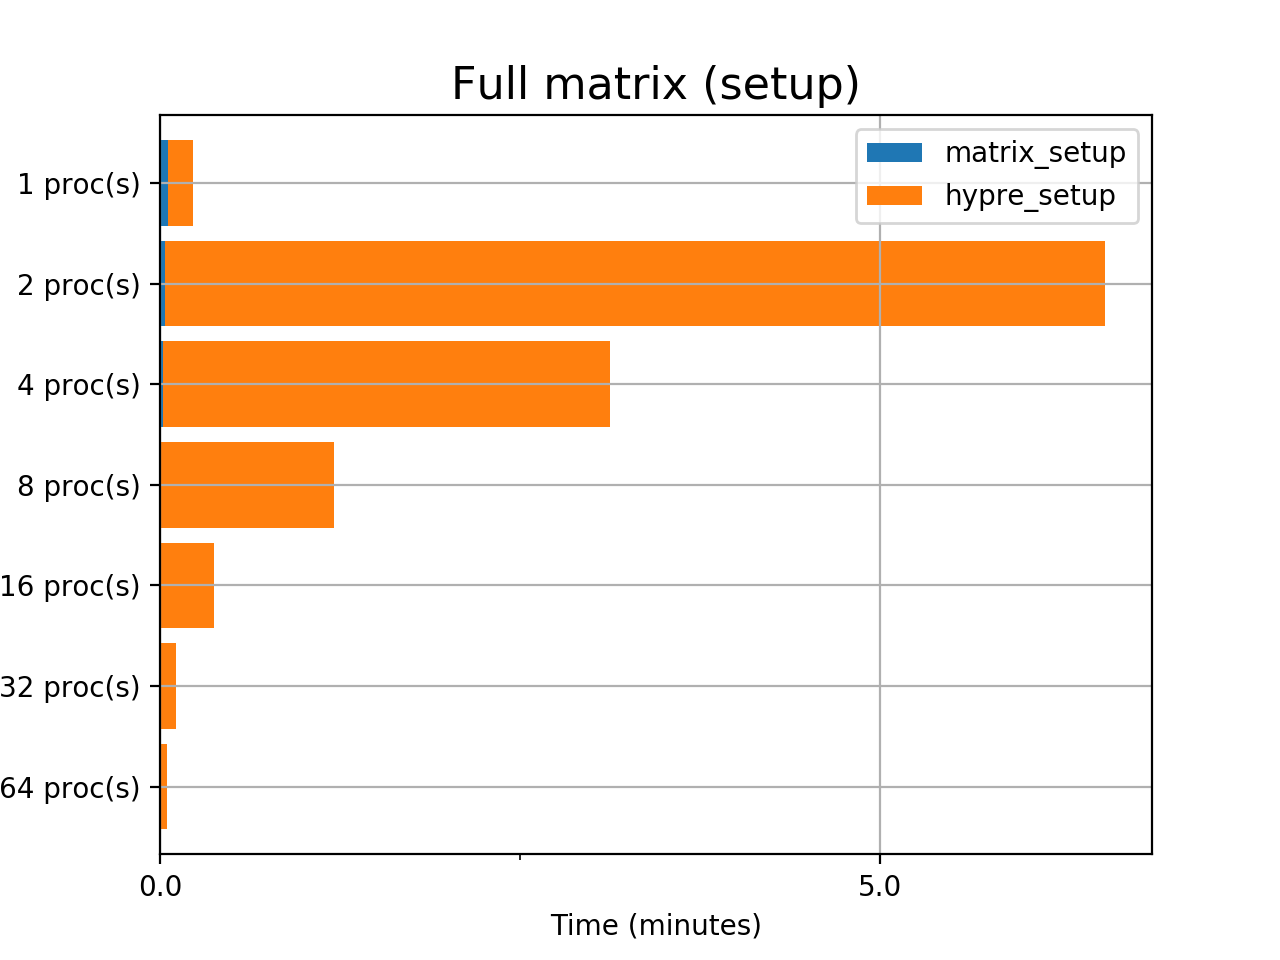

In [15]:
barh_plot(df_full_hypre,cols_setup_hypre)
plt.title('Full matrix (setup)',fontsize=16);
set_xticks(5,2.5,units='minutes')

## Full matrix (HYPRE) : Solve

<IPython.core.display.Javascript object>


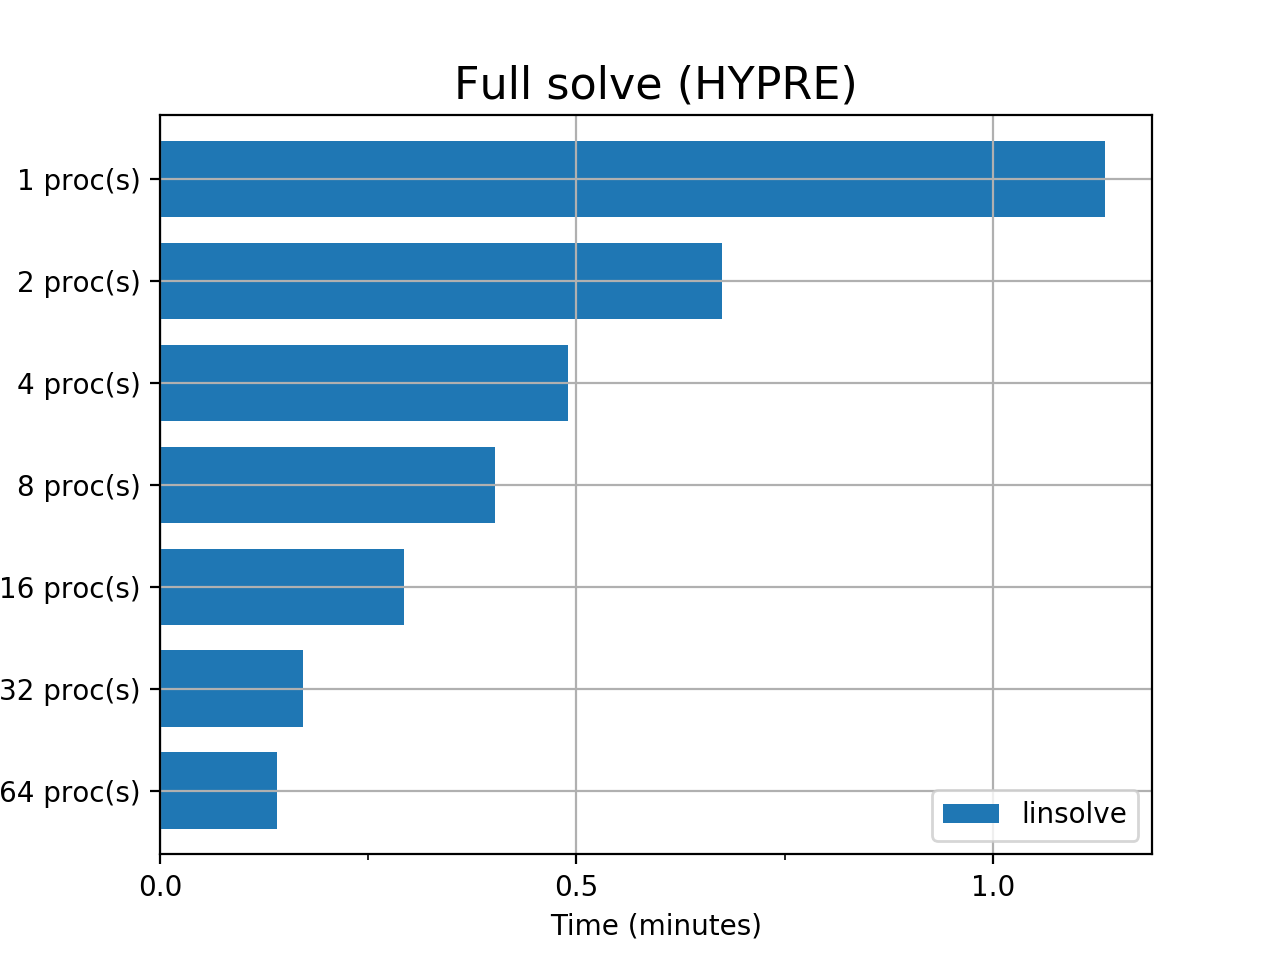

In [16]:
bar_plot(df_full_hypre,cols_solve_full)
plt.title('Full solve (HYPRE)',fontsize=16);
set_xticks(0.5,0.25,units='minutes')

## Full matrix (HYPRE) : Strong scaling

<IPython.core.display.Javascript object>


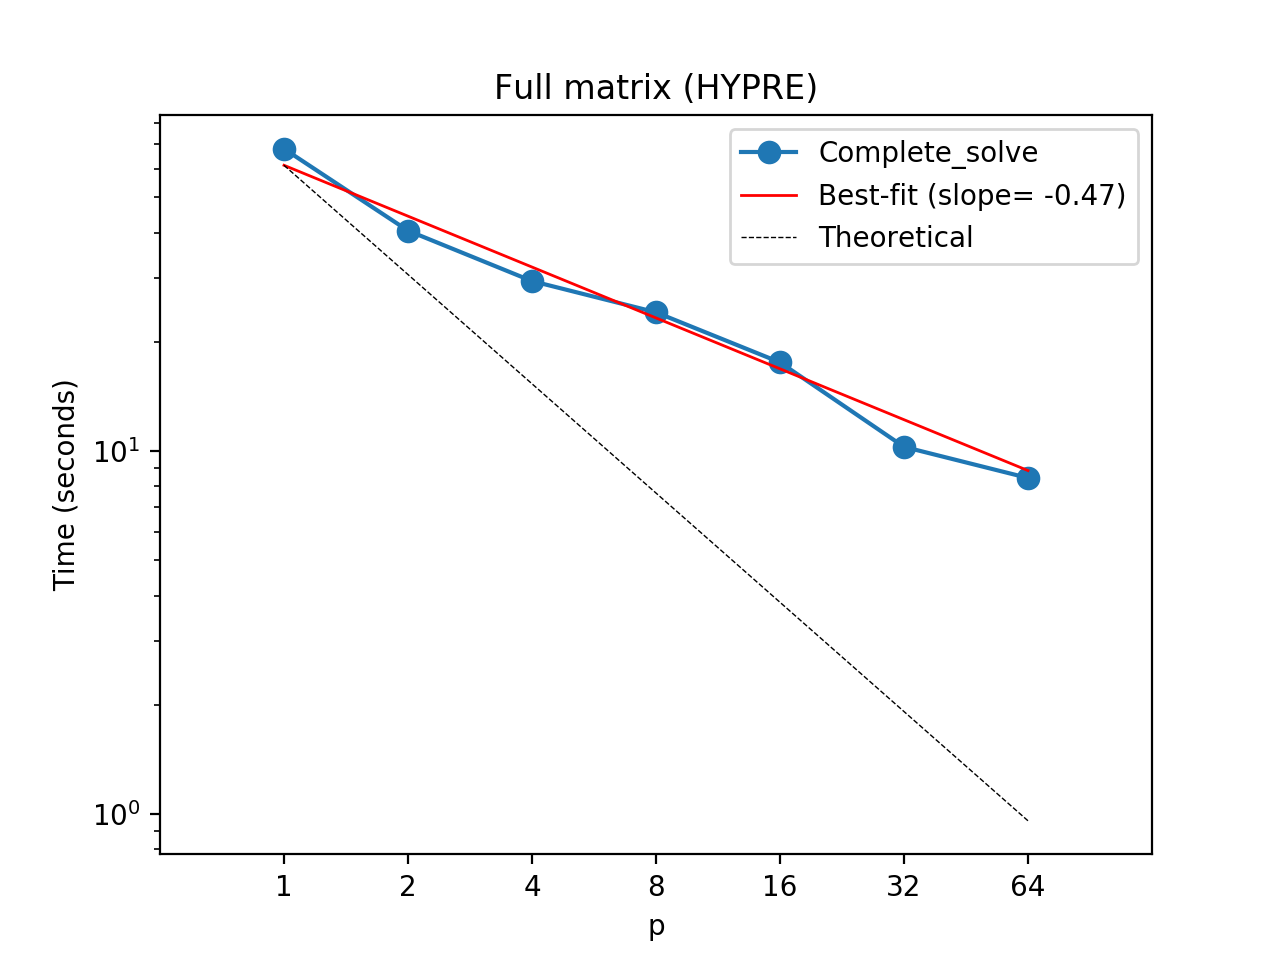

Text(0,0.5,'Time (seconds)')

In [17]:
strong_scaling(df_full_hypre,field='complete_solve')
plt.title('Full matrix (HYPRE)');
plt.ylabel('Time (seconds)')

## Full matrix (HYPRE) : Efficiency

<IPython.core.display.Javascript object>


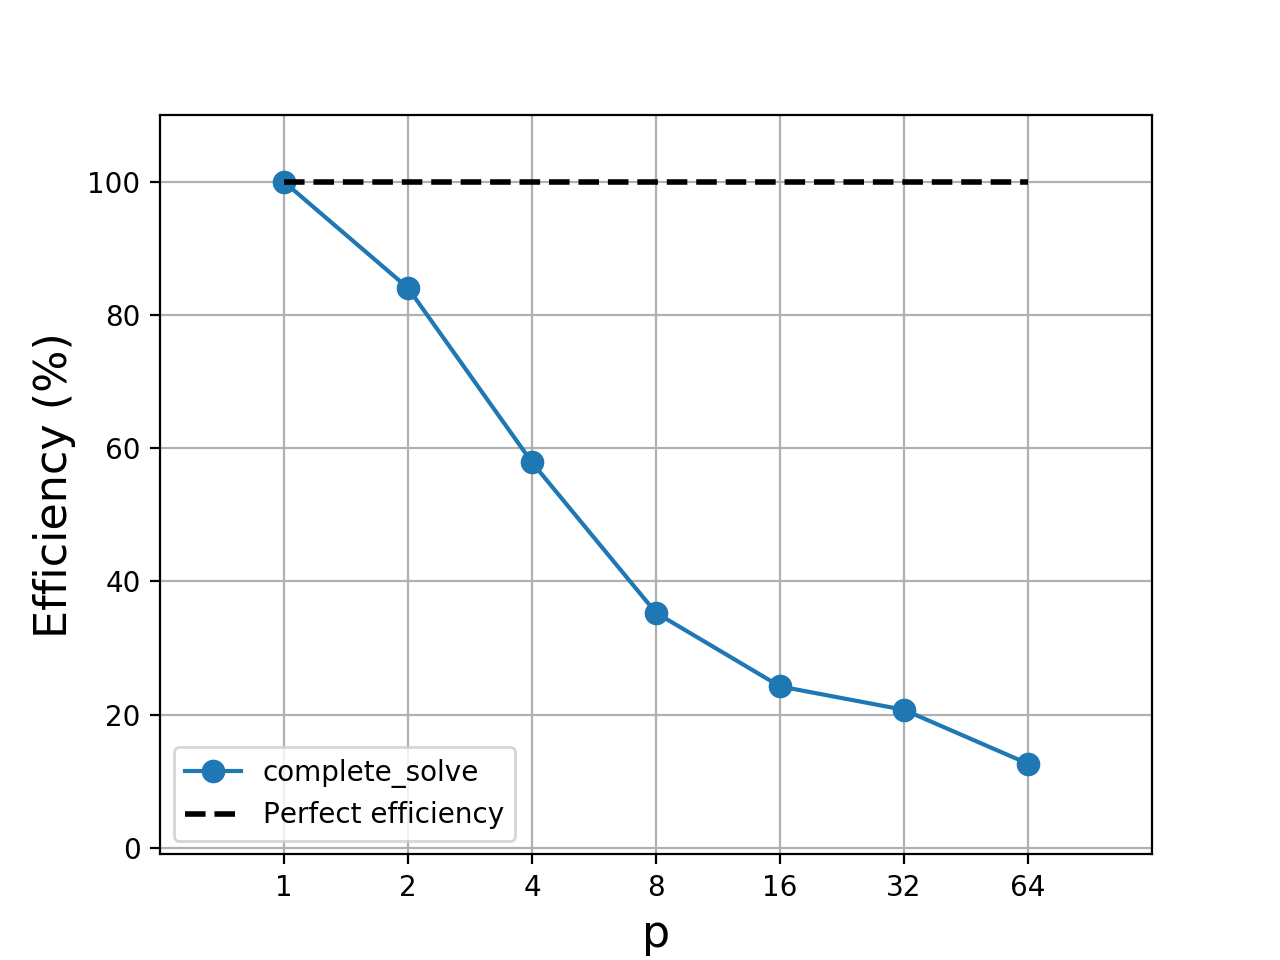

In [18]:
efficiency(df_full_hypre,'complete_solve')

<a id='schurhypre'></a>
<hr style="border-width:3px; border-color:coral"/>
# Schur matrix (HYPRE) 
<hr style="border-width:3px; border-color:coral"/>

In [19]:
print_table(df_schur_hypre);

,p,iterations,residual,error,domain_init,matrix_setup,hypre_setup,linsys_setup,linsolve,patch_solve,complete_solve,complete_setup
0,1,17,6.13e-11,2.30e-04,2.3198,4.7018,4.64366,9.3455,26.6610,0.2467,26.9077,9.3455
1,2,17,6.21e-11,2.30e-04,1.2815,2.4027,2.71339,5.1161,14.2418,0.1406,14.3825,5.1161
2,4,16,8.61e-11,2.30e-04,0.6509,1.3947,1.54163,2.9364,8.8950,0.0989,8.9940,2.9364
3,8,16,7.53e-11,2.30e-04,0.3381,0.8362,0.93157,1.7678,7.5887,0.0822,7.6713,1.7678
4,16,16,5.31e-11,2.30e-04,0.1806,0.5057,0.62095,1.1267,7.1687,0.0844,7.2539,1.1267
5,32,16,6.69e-11,2.30e-04,0.0882,0.2605,0.355689,0.6163,5.1474,0.0471,5.2005,0.6162
6,64,16,8.34e-11,2.30e-04,0.0443,0.1437,0.247546,0.3913,1.0968,0.0091,1.1060,0.3912


## Schur matrix (HYPRE) : Setup

Use HYPRE to solve the Schur complement system

<IPython.core.display.Javascript object>


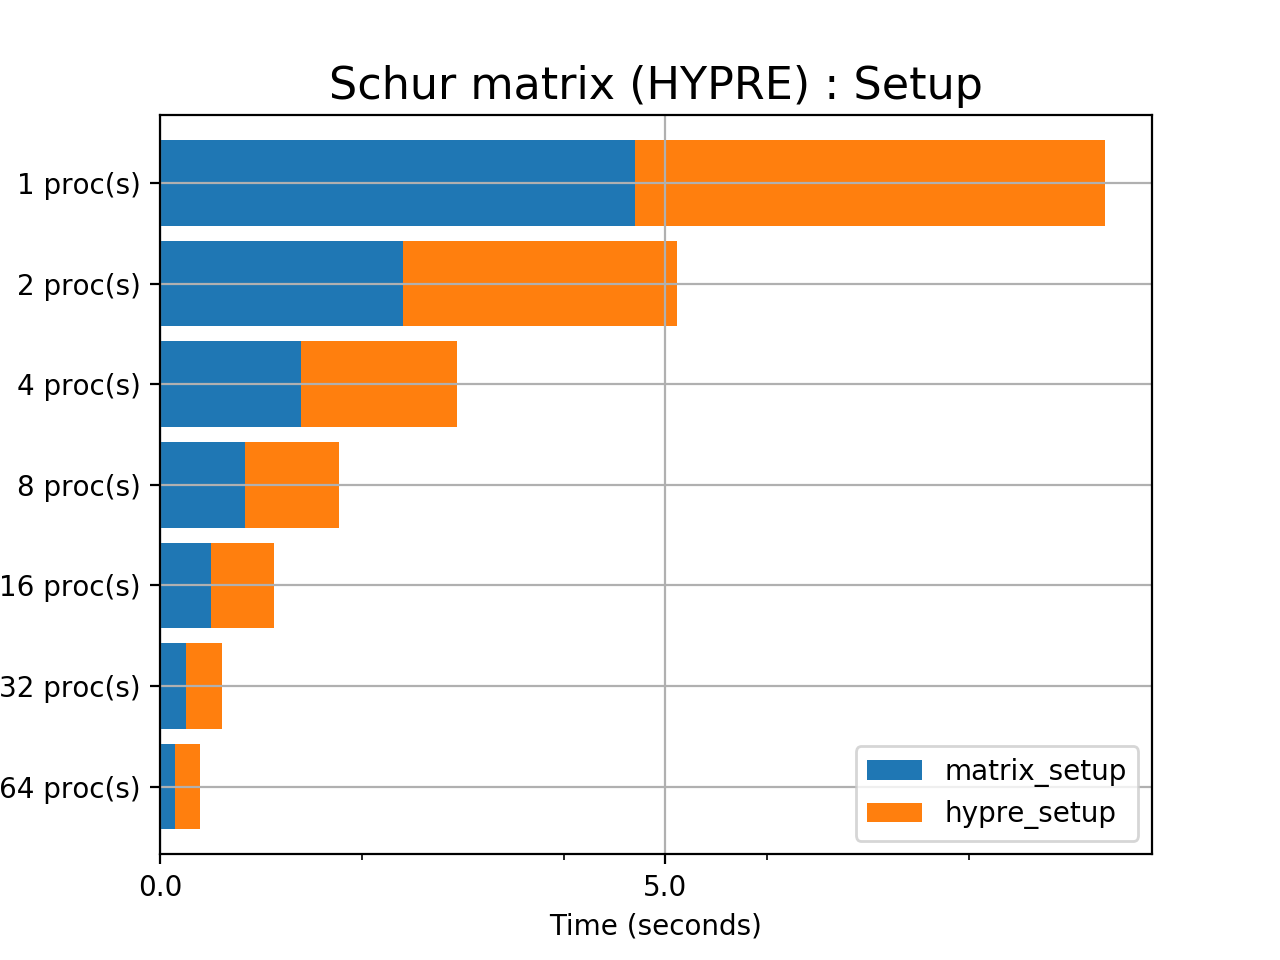

In [20]:
barh_plot(df_schur_hypre,cols_setup_hypre)
plt.title('Schur matrix (HYPRE) : Setup',fontsize=16);
set_xticks(5,2)

## Schur matrix (HYPRE) : Strong scaling (setup)

<IPython.core.display.Javascript object>


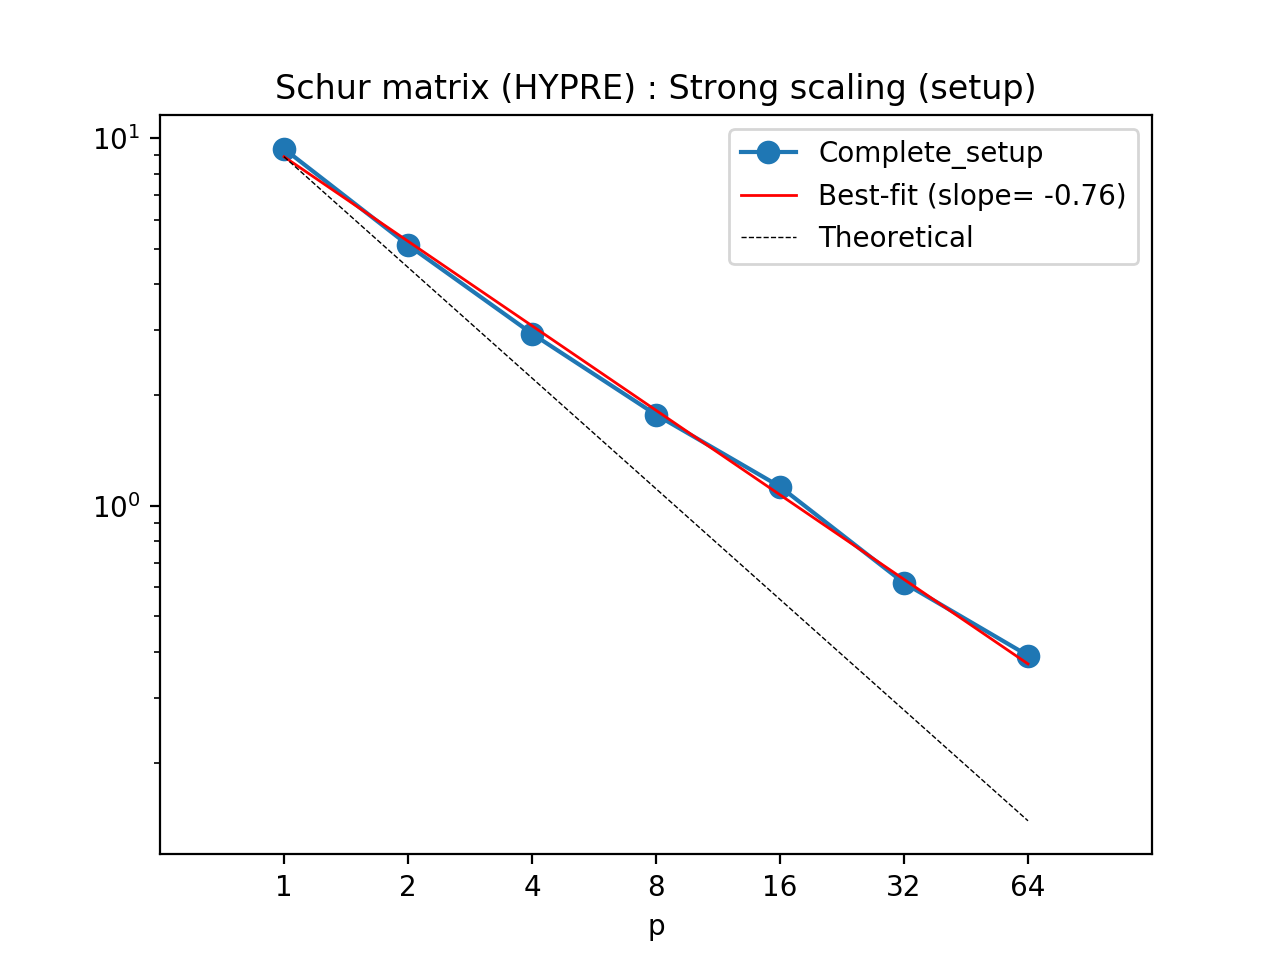

In [21]:
strong_scaling(df_schur_hypre,field='complete_setup')
plt.title('Schur matrix (HYPRE) : Strong scaling (setup)');

## Schur matrix (HYPRE) : Setup

In [ ]:
efficiency(df_schur_hypre,'complete_setup')

## Schur matrix (HYPRE) : Solve

In [ ]:
barh_plot(df_schur_hypre,cols_solve_schur)
plt.title('Schur matrix (HYPRE) : solve',fontsize=16);
set_xticks(5,2.5)

## Schur matrix (HYPRE) : Strong scaling (solve)

In [ ]:
strong_scaling(df_schur_hypre,field='complete_solve')
plt.title('Schur matrix (HYPRE) : Strong scaling (solve)');
plt.ylabel('Time (seconds)');

## Schur matrix (HYPRE) : Setup vs solve time 

In [ ]:
bar_plot(df_schur_hypre,['complete_solve','complete_setup'])
plt.title('Schur matrix (HYPRE) : Setup vs. solve',fontsize=16);
set_xticks(5,2.5)

## Schur matrix (HYPRE) : Efficiency

In [ ]:
efficiency(df_schur_hypre,'complete_solve')

<a id='fullamgx'></a>
<hr style="border-width:3px; border-color:coral"/>
# Full matrix (AMGX) 
<hr style="border-width:3px; border-color:coral"/>

Use AMGX to solve the full matrix system

In [ ]:
print_table(df_full_amgx);

## Full matrix (AMGX) : Setup

In [ ]:
barh_plot(df_full_amgx,cols_setup_amgx)
plt.title('Full matrix (AMGX) : Setup',fontsize=16);
set_xticks(5,2.5)

## Full matrix (AMGX) : Solve

In [ ]:
barh_plot(df_full_amgx,cols_solve_full)
plt.title('Full matrix (AMGX) : solve',fontsize=16);
set_xticks(1,0.25)

## Full matrix (AMGX) : Setup vs. solve

In [ ]:
bar_plot(df_full_amgx,['complete_solve','complete_setup'])
plt.title('Full matrix (AMGX) : Setup vs. solve',fontsize=16);
set_xticks(5,2.5)

## Full matrix (AMGX ) : Efficiency
This one doesn't work, since we don't have a values for 1 processor (this could easily be fixed, though).

In [ ]:
# efficiency(df_full_amgx,'complete_solve')

<a id='schuramgx'></a>
<hr style="border-width:3px; border-color:coral"/>
# Schur matrix (AMGX) 
<hr style="border-width:3px; border-color:coral"/>

Solve the Schur complement system using AMGX

In [ ]:
print_table(df_schur_amgx);

## Schur matrix (AMGX) : Setup

Use AMGX to solve the Schur complement system

In [ ]:
barh_plot(df_schur_amgx,cols_setup_amgx)
plt.title('Schur matrix (AMGX) : Setup',fontsize=16);
set_xticks(5,2.5)

## Schur matrix (AMGX) : Solve

In [ ]:
barh_plot(df_schur_amgx,cols_solve_schur)
plt.title('Schur matrix (AMGX) : solve',fontsize=16);
set_xticks(0.5,2.5)

## Schur matrix (AMGX) : Setup vs. solve

In [ ]:
bar_plot(df_schur_amgx,['complete_solve','complete_setup'])
plt.title('Schur matrix (AMGX) : Setup vs. solve',fontsize=16);
set_xticks(5,2.5)

## Schur matrix (AMGX) : Efficiency

In [ ]:
efficiency(df_schur_amgx,'complete_solve')

<a id='comparisons'></a>
<hr style="border-width:3px; border-color:coral"/>
# Comparisons between full and Schur systems
<hr style="border-width:3px; border-color:coral"/>

In [5]:
panel = pd.Panel({'Full (HYPRE)' : df_full_hypre, 'Schur (HYPRE)' : df_schur_hypre,
                 'Full (AMGX)' : df_full_amgx, 'Schur (AMGX)' : df_schur_amgx})
procs = df_full_hypre['p']

## Comparisons : Setup

In [ ]:
df_setup = panel.minor_xs('complete_setup')
df_setup.insert(0,'p',procs)
df_setup

In [ ]:
df_setup.plot(x='p',logx=True,logy=True,style='.-',markersize=10)
plt.xlabel('p')
plt.ylabel('Time (seconds)')
plt.title('Setup time',fontsize=16);
fix_xticks(df_setup['p'].values)

In [ ]:
cols = ['Schur (AMGX)', 'Full (AMGX)', 'Schur (HYPRE)', 'Full (HYPRE)']
bar_plot(df_setup,cols=cols)
plt.title("Comparisons : Setup", fontsize=16);
set_xticks(2.5,0.5,units='minutes')

In [ ]:
cols = ['Schur (AMGX)', 'Full (AMGX)', 'Schur (HYPRE)', 'Full (HYPRE)']
bar_plot(df_setup,cols=cols)
plt.title("Comparisons : Setup", fontsize=16);
set_xticks(35,2.5)

## Comparisons : Solve

In [22]:
df_solve = panel.minor_xs('complete_solve')
df_solve.insert(0,'p',procs)
df_solve

,p,Full (AMGX),Full (HYPRE),Schur (AMGX),Schur (HYPRE)
0,1,NaN,68.068060,1.690548,26.907745
1,2,NaN,40.492793,1.013779,14.382487
2,4,3.168813,29.408292,0.633120,8.993995
3,8,2.435413,24.118250,0.825867,7.671255
4,16,3.466121,17.558434,0.685694,7.253857
5,32,NaN,10.271640,NaN,5.200461
6,64,NaN,8.431653,NaN,1.106002


<IPython.core.display.Javascript object>


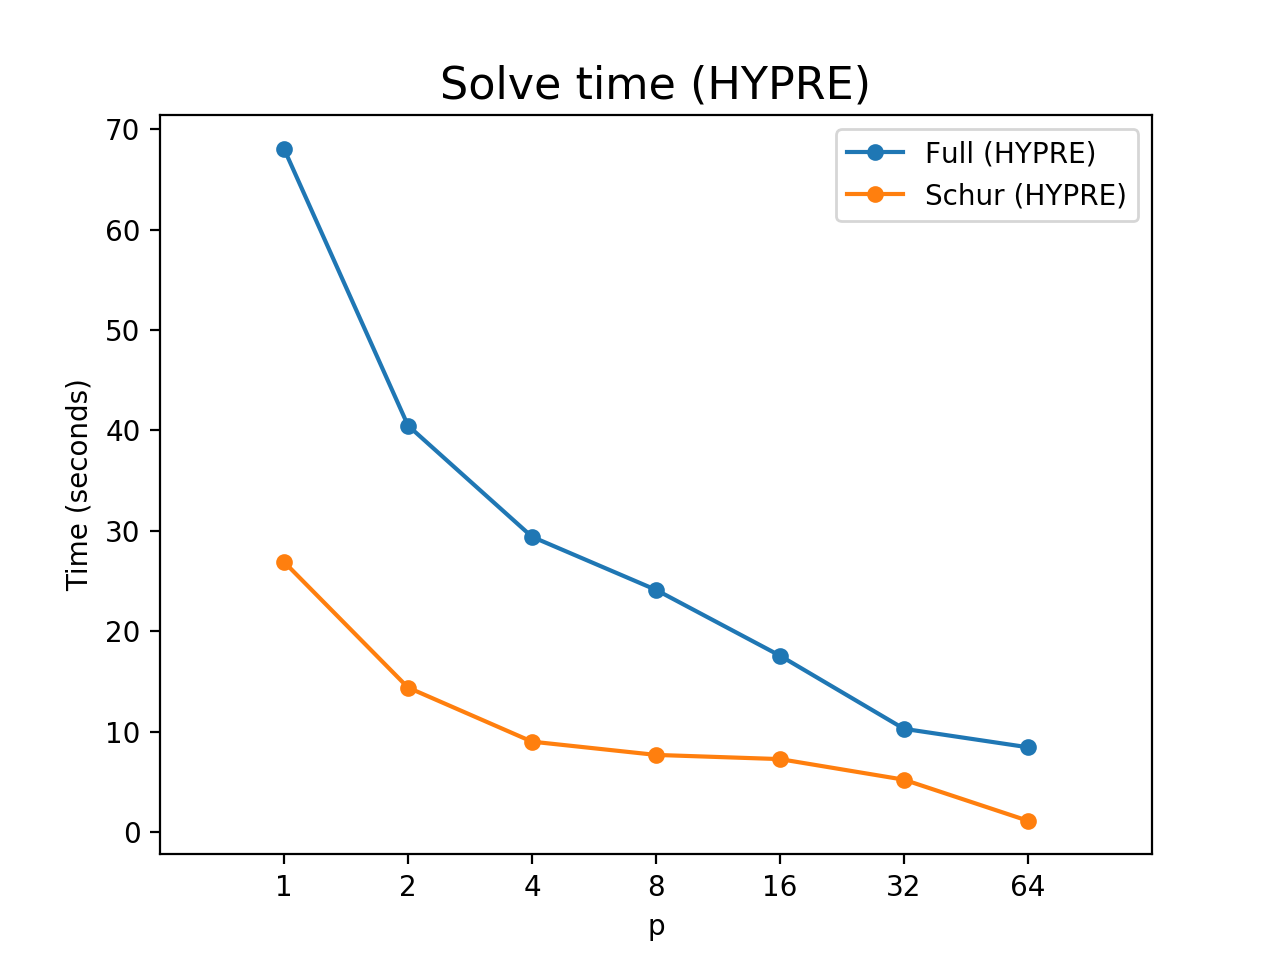

In [23]:
cols = ['p','Full (HYPRE)','Schur (HYPRE)']
df_solve[cols].plot(x='p',logx=True,logy=False,style='.-',markersize=10)
plt.xlabel('p')
plt.ylabel('Time (seconds)')
plt.title('Solve time (HYPRE)',fontsize=16);
fix_xticks(df_solve['p'].values)

<IPython.core.display.Javascript object>


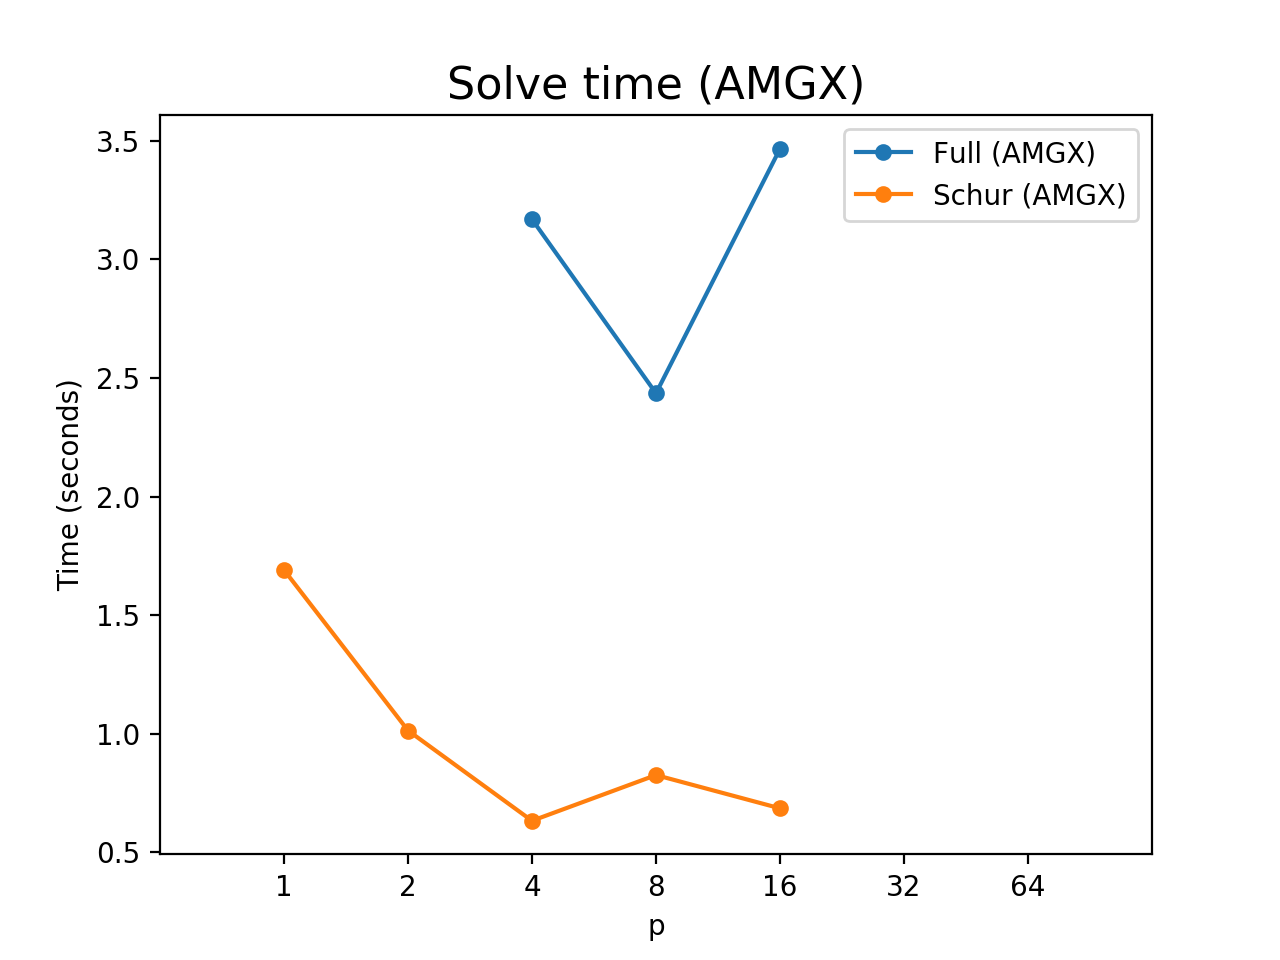

In [8]:
cols = ['p','Full (AMGX)','Schur (AMGX)']
df_solve[cols].plot(x='p',logx=True,logy=False,style='.-',markersize=10)
plt.xlabel('p')
plt.ylabel('Time (seconds)')
plt.title('Solve time (AMGX)',fontsize=16);
fix_xticks(df_solve['p'].values)

<IPython.core.display.Javascript object>


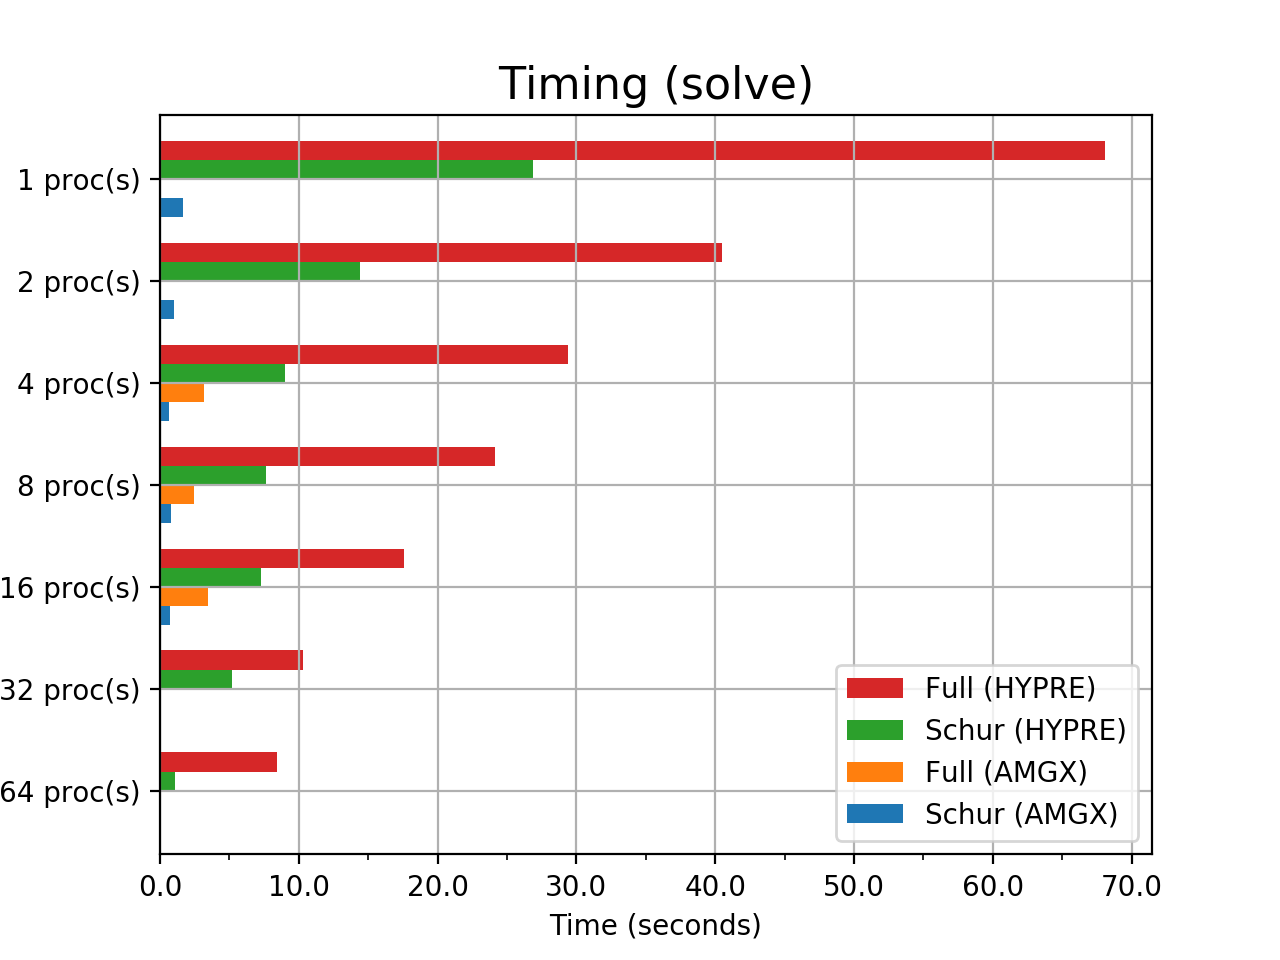

In [9]:
cols = ['Schur (AMGX)', 'Full (AMGX)', 'Schur (HYPRE)', 'Full (HYPRE)']
bar_plot(df_solve,cols=cols)
plt.title("Timing (solve)", fontsize=16);